# Activity: Build an XGBoost model

## Introduction

In this activity, you’ll build on the skills and techniques you learned in the decision tree and random forest lessons to construct your own XGBoost classification model. The XGBoost model is a very powerful extension of decision trees, so having a strong working familiarity with this process will strengthen your skills and resume as a data professional.

This activity is a continuation of the airlines project in which you built decision tree and random forest models. You will use the same data, but this time you will train, tune, and evaluate an XGBoost model. You’ll then compare the performance of all three models and decide which model is best. Finally, you’ll explore the feature importances of your model and identify the features that most contribute to customer satisfaction.


## Step 1: Imports

### Import packages

Begin with your import statements. First, import `pandas`, `numpy`, and `matplotlib` for data preparation. Next, import scikit-learn (`sklearn`) for model preparation and evaluation. Then, import `xgboost`, which provides the classification algorithm you'll implement to formulate your predictive model.

In [2]:
# Import relevant libraries and modules.i
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from xgboost import XGBClassifier
from xgboost import plot_importance
import pickle

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay,\
RocCurveDisplay


### YOUR CODE HERE ###

### Load the dataset

To formulate your model, `pandas` is used to import a csv of airline passenger satisfaction data called `Invistico_Airline.csv`. This DataFrame is called `airline_data`. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [3]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

### YOUR CODE HERE ###

airline_data = pd.read_csv('Invistico_Airline.csv', error_bad_lines=False)

### Display the data

Examine the first 10 rows of data to familiarize yourself with the dataset.

In [4]:
# Display the first ten rows of data.
airline_data.head(n=10)
### YOUR CODE HERE ###

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,...,2,2,5,4,5,5,4,2,0,0.0
6,satisfied,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,3,...,5,5,5,0,5,5,5,3,17,15.0
7,satisfied,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,3,...,2,2,3,3,4,5,4,2,0,0.0
8,satisfied,Loyal Customer,56,Personal Travel,Business,73,0,0,0,3,...,5,4,4,0,1,5,4,4,0,0.0
9,satisfied,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,3,...,2,2,2,4,5,3,4,2,30,26.0


### Display the data type for each column

Next, observe the types of data present within this dataset.

In [5]:
# Display the data type for each column in your DataFrame.
airline_data.dtypes
### YOUR CODE HERE ###

satisfaction                          object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
dtype: obj

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Recall the methods for exploring DataFrames.
</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Recall a property of a `pandas` DataFrame that allows you to view the data type for each column.</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Call `.dtypes` on your DataFrame `airline_data` to view the data type of each column.</details>

**Question:** Identify the target (or predicted) variable for passenger satisfaction. What is your initial hypothesis about which variables will be valuable in predicting satisfaction?

[To me, the most imprtant features would be online ticket_booking, cleanliness, departure delay in minutes and class] 

## Step 2: Model preparation

Before you proceed with modeling, consider which metrics you will ultimately want to leverage to evaluate your model.

**Question:** Which metrics are most suited to evaluating this type of model?

[Apart from the four metrices accuracy, precision, recall and f1 score, we can plot fonfusion martix to see the true and prediocted behaviour of the values. And then we have an XGBoost importance plot which will tell us how much did the each feature contribute in prediction.]

### Prepare your data for predictions

You may have noticed when previewing your data that there are several non-numerical variables (`object` data types) within the dataset.

To prepare this DataFrame for modeling, first convert these variables into a numerical format.

In [6]:
# Convert the object predictor variables to numerical dummies.
#airline_data['satisfaction']=airline_data['satisfaction'].map({'satisfied': 1, 'dissatisfied': 0})
airline_data = pd.get_dummies(airline_data, drop_first = True)
airline_data.head()
### YOUR CODE HERE ###

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,...,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction_satisfied,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,65,265,0,0,0,2,2,4,2,3,...,5,3,2,0,0.0,1,0,1,1,0
1,47,2464,0,0,0,3,0,2,2,3,...,2,3,2,310,305.0,1,0,1,0,0
2,15,2138,0,0,0,3,2,0,2,2,...,4,4,2,0,0.0,1,0,1,1,0
3,60,623,0,0,0,3,3,4,3,1,...,4,1,3,0,0.0,1,0,1,1,0
4,70,354,0,0,0,3,4,3,4,2,...,4,2,5,0,0.0,1,0,1,1,0


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about feature engineering](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/5mEqu/introduction-to-feature-engineering).
</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the `pandas` function for transforming categorical data into "dummy" variables.</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Use the `get_dummies()` function on your DataFrame `airline_data` to create dummies for the categorical variables in your dataset. Note that your target variable will also need this treatment.</details>

### Isolate your target and predictor variables
Separately define the target variable (`satisfaction`) and the features.

In [7]:
# Define the y (target) variable.
y=airline_data['satisfaction_satisfied']

### YOUR CODE HERE ###
X= airline_data.drop(['satisfaction_satisfied'], axis =1)

# Define the X (predictor) variables.

### YOUR CODE HERE ###

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about splitting your data into x and y](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/ozK9K/build-a-decision-tree-with-python).
</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

In `pandas`, use square brackets `[]` to subset your DataFrame by specifying which column(s) to select. Also, quickly subset a DataFrame to exclude a particular column by using the `drop()` function and specifying the column to drop.
</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

In this case, your target variable was split into two columns from the dummy split. Be sure to include only the column which assigns a positive (i.e., "satisfied") outcome as 1.
</details>

### Divide your data 

Divide your data into a training set (75% of the data) and test set (25% of the data). This is an important step in the process, as it allows you to reserve a part of the data that the model has not used to test how well the model generalizes (or performs) on new data.

In [8]:
# Perform the split operation on your data.
# Assign the outputs as follows: X_train, X_test, y_train, y_test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
### YOUR CODE HERE ###

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about splitting your data between a training and test set](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/ozK9K/build-a-decision-tree-with-python).
</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

To perform the splitting, call the function in the `model_selection` module of `sklearn` on the features and target variable.
</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Call the `train_test_split()` function, passing in both `features` and `target`, while configuring the appropriate `test_size`. Assign the output of this split as `X_train`, `X_test`, `y_train`, `y_test`.
</details>

## Step 3: Model building

### "Instantiate" your XGBClassifer

Before you fit your model to your airline dataset, first create the XGB Classifier model and define its objective. You'll use this model to fit and score different hyperparameters during the GridSearch cross-validation process.

In [9]:
# Define xgb to be your XGBClassifier.
xgb = XGBClassifier(objective='binary:logistic', random_state=0)

### YOUR CODE HERE ###

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about constructing a classifier model from `xgboost`](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/njRAP/build-an-xgboost-model-with-python).</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Note that the target variable in this case is a binary variable. </details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Use the `XGBClassifier()` from `xgboost`. Set the objective as `binary:logistic`.
</details>

### Define the parameters for hyperparameter tuning

To identify suitable parameters for your `xgboost` model, first define the parameters for hyperparameter tuning. Specifically, consider tuning `max_depth`, `min_child_weight`, `learning_rate`, `n_estimators`, `subsample`, and/or `colsample_bytree`.

Consider a more limited range for each hyperparameter to allow for timely iteration and model training. For example, using a single possible value for each of the six hyperparameters listed above will take approximately one minute to run on this platform.

```
{
    'max_depth': [4],
    'min_child_weight': [3],
    'learning_rate': [0.1],
    'n_estimators': [5],
    'subsample': [0.7],
    'colsample_bytree': [0.7]
}
```

If you add just one new option, for example by changing `max_depth: [4]` to `max_depth: [3, 6]`, and keep everything else the same, you can expect the run time to approximately double. If you use two possibilities for each hyperparameter, the run time would extend to ~1 hour. 
         

In [10]:
# Define parameters for tuning as `cv_params`.

cv_params = {
                'max_depth': [4],
                'min_child_weight': [3],
                'learning_rate': [0.1],
                'n_estimators': [5],
                'subsample': [0.7],
                'colsample_bytree': [0.7]
            }
### YOUR CODE HERE ###

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about hyperparameter tuning using GridSearch cross-validation](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/afopk/tune-a-decision-tree).</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Consider a range of values for each parameter, similar to what you observed in the lesson. </details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Define these parameters using a Python dictionary in the following format: `{'parameter1': [range,of,values]}`</details>

**Question:** What is the likely effect of adding more estimators to your GridSearch?

[increasing the n_estimators will incfrease the number of base learners which will increase the computaional time. But, increasing the base estimators will increaing it's performance. increasing the n_estimators will increase the risk of overfitting]

### Define how the models will be evaluated

Define how the models will be evaluated for hyperparameter tuning. To yield the best understanding of model performance, utilize a suite of metrics.

In [11]:
# Define your criteria as `scoring`.
scores = {'accuracy', 'precision', 'recall', 'f1'}
### YOUR CODE HERE ###

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Recall what you've learned about [using metric evaluation](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/afopk/tune-a-decision-tree) to determine the metrics you include.</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Consider what you've learned about the limitations of only including a single metric, such as `accuracy`. </details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Define metrics which balance the false positives and false negatives in binary classification problems.

### Construct the GridSearch cross-validation 

Construct the GridSearch cross-validation using the model, parameters, and scoring metrics you defined. Additionally, define the number of folds and specify *which metric* from above will guide the refit strategy.

In [12]:
# Construct your GridSearch.

cv_xgb = GridSearchCV(xgb, cv_params, scoring=scores, cv=5, refit='f1')
### YOUR CODE HERE ###

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Recall what you've learned about constructing a GridSearch for [cross-validation](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/W4vAW/verify-performance-using-validation).</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Balance the time spent on validation with the number of folds you choose. </details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Choose the refit method which simultaneously balances false positives and false negatives.

### Fit the GridSearch model to your training data

If your GridSearch takes too long, revisit the parameter ranges above and consider narrowing the range and reducing the number of estimators.

**Note:** The following cell might take several minutes to run.

In [13]:
%%time
# fit the GridSearch model to training data
cv_xgb.fit(X_train, y_train)
print(cv_xgb.best_params_)
### YOUR CODE HERE ###

{'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 3, 'n_estimators': 5, 'subsample': 0.7}
CPU times: user 2min 51s, sys: 440 ms, total: 2min 52s
Wall time: 1min 26s


**Question:** Which optimal set of parameters did the GridSearch yield?

[The parameters that the gridsearch yielded are {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 3, 'n_estimators': 5, 'subsample': 0.7}]

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Recall what you've learned about the result of the GridSearch.</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Once you've fitted the GridSearch model to your training data, there will be an attribute to access which yields to the optimal parameter set.</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Access the `best_params_` attribute from your fitted model. </details>

### Save your model for reference using `pickle`

Use the `pickle` library you've already imported to save the output of this model.

In [14]:
# Use `pickle` to save the trained model.
with open('cv_xgb_model.pickle', 'wb') as to_write:
         pickle.dump(cv_xgb, to_write)


### YOUR CODE HERE ###
#with open("cv_xgb_model.pickle", "rb") as f:
 #   cv_xgb = pickle.load(f)
    
#print(cv_xgb)

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about "pickling" prior models](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/FSnam/build-and-validate-a-random-forest-model-using-a-validation-data-set).</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

The model to be pickled is the fitted GridSearch model from above. </details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Call `pickle.dump()`, reference the fitted GridSearch model, and provide a name for the pickle file.

## Step 4: Results and evaluation

### Formulate predictions on your test set

To evaluate the predictions yielded from your model, leverage a series of metrics and evaluation techniques from scikit-learn by examining the actual observed values in the test set relative to your model's prediction.

First, use your trained model to formulate predictions on your test set.

In [15]:
# Apply your model to predict on your test data. Call this output "y_pred".
y_pred = cv_xgb.predict(X_test)

### YOUR CODE HERE ###

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Recall what you've learned about creating predictions from trained models.</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the fitted GridSearch model from your training set and predict the predictor variables you reserved in the train-test split.</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Call `predict()` on your fitted model and reference `X_test` to create these predictions.
</details>

### Leverage metrics to evaluate your model's performance

Apply a series of metrics from scikit-learn to assess your model. Specifically, print the accuracy score, precision score, recall score, and f1 score associated with your test data and predicted values.

In [16]:
# 1. Print your accuracy score.
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
### YOUR CODE HERE ###

# 2. Print your precision score.

precision = precision_score(y_test, y_pred)
print(precision)
### YOUR CODE HERE ###


# 3. Print your recall score.

recall = recall_score(y_test, y_pred)
print(recall)

### YOUR CODE HERE ###

# 4. Print your f1 score.
f1 = f1_score(y_test, y_pred)
print(f1)

### YOUR CODE HERE ###

0.8874653526331999
0.8847154471544716
0.914453781512605
0.8993388429752066


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about model evaluation for detail on these metrics](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/njRAP/build-an-xgboost-model-with-python).
</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the function in the `metrics` module in `sklearn` to compute each of these metrics.
</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Call `accuracy_score()`, `precision_score()`, `recall_score()`, and `f1_score()`, passing `y_test` and `y_pred` into each.
</details>

**Question:** How should you interpret your accuracy score?

[All the score are pretty much the same. Accuracy score is the true predicted values out of all the values. And it's value is around 88%

**Question:** Is your accuracy score alone sufficient to evaluate your model?

[well it is not possible to evaluate the model on only accuracy score, because if the calss imbalance is there then it won't tell us the right insight of the model.]

**Question:** When observing the precision and recall scores of your model, how do you interpret these values, and is one more accurate than the other?

[The recall value is slightly higher than the precision. it means the model is more inclined and robust towards predicting true positives. In the pursuite of not predicting false positives the model is predicting false negatives more]

**Question:** What does your model's F1 score tell you, beyond what the other metrics provide?*

[f1 score is almots 90%. which means the harmonic mean of precision and recall is close to their values and there is less difference between the two. but higher recall value than f1 shows that the model is more inclined towards not predicting false positive]

### Gain clarity with the confusion matrix

Recall that a **confusion matrix** is a graphic that shows a model's true and false positives and true and false negatives. It helps to create a visual representation of the components feeding into the metrics above.

Create a confusion matrix based on your predicted values for the test set.

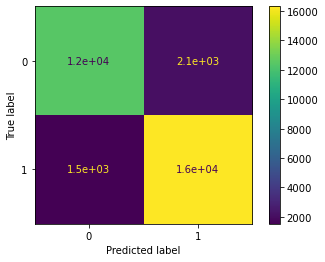

In [17]:
# Construct and display your confusion matrix.
# we will make a function of the confusion matrix
def make_confusion_matrix(model, X_data, y_data):
    
    y_pred = model.predict(X_data)
    cm = confusion_matrix(y_data, y_pred, labels= model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=model.classes_)
    disp.plot()
    plt.show()
# Construct the confusion matrix for your predicted and test values.

### YOUR CODE HERE ###

# Create the display for your confusion matrix.

### YOUR CODE HERE ###

# Plot the visual in-line.
make_confusion_matrix(cv_xgb, X_test, y_test)
### YOUR CODE HERE ###

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about model evaluation](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/njRAP/build-an-xgboost-model-with-python).
</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the functions in the `metrics` module to create a confusion matrix.
</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Call `confusion_matrix`, passing in `y_test` and `y_pred`. Next, utilize `ConfusionMatrixDisplay()` to display your confusion matrix.
</details>

**Question:** When observing your confusion matrix, what do you notice? Does this correlate to any of your other calculations?

[looking at the confusion matrix we can observe how the model is performing and which class the model is penalizing more. for example if the model is more conscious about not predicting the wrong positives it will make more errors towards negative predictions becauese we made it more tight towards not predicting wring positioned]

### Visualize most important features

`xgboost` has a built-in function to visualize the relative importance of the features in the model using `matplotlib`. Output and examine the feature importance of your model.

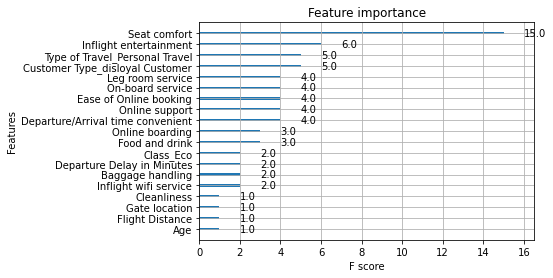

In [18]:
# Plot the relative feature importance of the predictor variables in your model.
cv_xgb_best = cv_xgb.best_estimator_
plot_importance(cv_xgb_best)
### YOUR CODE HERE ###



<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Recall the attributes that are provided once the model is fitted to training data.</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Examine the `best_estimator_` attribute of your fitted model.</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

To easily visualize feature importance, call the built-in `plot_importance` function `xgboost` offers on the `best_estimator_`.</details>

**Question:** Examine the feature importances outputted above. What is your assessment of the result? Did anything surprise you?

[Write your response here. Double-click (or enter) to edit.]

### Compare models

Create a table of results to compare model performance.

In [22]:
# Create a table of results to compare model performance.

table = pd.DataFrame({"model":['xgboost classifier'],
        'accuracy': [accuracy],
        'predision': [precision],
        'recall' : [recall],
        'f1': [f1]
        }
                    )
table
### YOUR CODE HERE ###

,model,accuracy,predision,recall,f1
0,xgboost classifier,0.887465,0.884715,0.914454,0.899339


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Create a DataFrame and using the `pd.DataFrame()` function. 

</details>

**Question:** How does this model compare to the decision tree and random forest models you built in previous labs? 

[I observed a performance less with this model compared to the other two. The f1 score, recall, precision and accuracy with xgboost are less than those with random forest and decision tree. However, random forest performed even better than decision tree model.]

## Considerations

**What are some key takeaways you learned from this lab?**

[Xgboost classifier and regressors are powerfull model for the prediction. Over a specific number of iterations with a certain learning rate the model could the learn very effectively
it is impotranat to inform about the evaluation of the model, if it performed well
splitting data is important to ensure model is tested on an unseen data
]

**How would you share your findings with your team?**

[XGBoost classifier was applied on plane passenegrs' satisfaction data. show up the data and the performance of the model.
The model showed promissing results with both the training data and test data
Accuracy, precision, recall anf f1 score are around 90%]

**What would you share with and recommend to stakeholders?**

[The model built is performing effective on the data predicting passengers satisfaction 
The highest feature importance is with the seat comfort. In other words seat comfort hold the most importance by far in determining the satistfaction of the passenger.]


**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged